(numerical-modeling:bvps)=
# Boundary-value Problems: second-order ODE

To solve a first order ODE, one constraint is needed (initial value problem, IVP). In the case of a second order ODE, two constraints are needed. If the constraints are defined at different locations of the domain, then you will be dealing with a Boundary-value problem (BVP). Mostly when we use time derivatives we have an IVP and when we have a derivative in space we have to deal with spacial constraints and therefore BVP's. See the following examples:

$$
\frac{dp}{dt} = -p^{3/2} + 5*p_{cst}(1-e^{-t}) \text{ first order ODE -> IVP with 1 constraints }  p[0] = 1000 
$$

$$
\frac{d^2y}{dt^2} = \frac{dy}{dt} -y + \cos t =0 \text{ second order ODE -> IVP with 2 constraints }  y[0] = 2 \text{ and } \left. \frac{dy}{dt} \right|_{t=0} = 5
$$

$$
\frac{d^2T}{dx^2}-\alpha_1(T-T_s) =0 \text{ second order ODE -> BVP with 2 constraints }  T[0] = 10 \text{ and }T[-1] = 20
$$

Even for higher ODE orders, the number of constrains required corresponds to the order of the ODE. It is clear that a second order ODE can either be an IVP or a BVP. The former case is common when describing time derivatives and the latter case is common when describing space derivatives. From now on, we focus on BVP. 

## Boundary Conditions

A second order ODE BVP of the type:

$$
\frac{d^2y}{dx^2} = g\left(x,y,\frac{dy}{dx}\right)
$$

with a domain solution $a<=x<=b$ and boundary conditions (or constraints) defined at $a$ and $b$ typically has two types of boundary conditions.

 - *Dirichlet* boundary conditions fix the value of $y$ at the boundary:

$$
y(x=a) = Y_a \text{ and } y(x=b) = Y_b
$$

 - *Neumann* boundary conditions fix the derivative of $y$ at the boundary:

$$
\left. \frac{dy}{dx} \right|_{x=a} = D_a \text{ and } \left. \frac{dy}{dx} \right|_{x=b} = D_b
$$

Of course, a combination of boundary conditions can also exist.

### An example: bending beam

Consider the following equation that describes the deformation $y$ of a beam with length $L$ clamped at $x=0$ and $x=L$:

$$
\frac{d^4y}{dx^4}=\alpha \text{ load}(x) 
$$

where $\alpha$ represents the beams material characteristics.

As it is an ODE of fourth order, it needs four boundary conditions. The nature of the problem states that the **deformation** and the **slope of the deformation** at the ends is 0, thus, two Dirichlet and two Neumann boundary conditions:  

$$
y(0)=0, \quad y(L)=0$$

$$
\left. \frac{dy}{dx} \right|_{x=0}=0, \quad \left. \frac{dy}{dx} \right|_{x=L}=0$$

```{figure} https://files.mude.citg.tudelft.nl/Beam.svg
:name: Beam

Boundary conditions of a fourth order ODE that describes the deformation of a beam 
```


## Solving a BVP using Finite Differences

### Example: temperature convection

Next, we will go through the steps of numerically solving a boundary value problem with the finite difference method.
As an example, consider the following second-order differential equation that describes the temperature $T$ in a thin metal rod:

$$
\frac{d^2T}{dx^2} - \alpha(T-T_s)= 0, \quad x \in(0,0.1)
$$

The first terms describes heat conduction in the rod, whereas the second term represents heat exchange with the surroundings which keep a constant temperature $T_s$.
The temperature at both ends of the rod is fixed:

$$
T(0)= 473\,\mathrm{K}
$$

$$
T(0.1)= 293\,\mathrm{K}
$$

The values of the parameters are $\alpha=166\,\mathrm{m}^{-2}$ and $T_s= 293\,\mathrm{K}$.

### Discretization

Just like in the initial value problem section, we will approximate the derivative numerically following a desired method and order of accuracy. Now the domain going from $a$ to $b$ is discretized using a determined number of grid points $n$ and, thus, a number of sub-intervals $N$. There is always one more point than sub-intervals, $n=N+1$. This is the grid (see {numref}`grid` below) and, if the spacing is regular, then the length of the sub-interval is $\Delta x = (b-a)/N$. 


```{figure} https://files.mude.citg.tudelft.nl/grid.svg
:name: grid

Illustration of the grid, highlighting the two external boundary nodes with known temperatures ($T$) and the internal nodes where the temperature values must be estimated.
```

The boundary conditions are defined at the end points and the discretization is applied at **almost** every point. This depends on the numerical approximation. The following steps are followed to solve a BVP:

1. Discretize the differential equation with a numerical approximation of choice
2. Define all parameters
3. Create a grid
4. Define Boundary conditions 
5. Build a system of equations according to the discretization: $Ay=b$
6. Solve the system of equations

We will use the central finite difference method to approximate the second order derivative, and discretize the domain into 5 equally spaced intervals.

$$
f''= \frac{f(x_i-\Delta x)-2f(x_i)+f(x_i+\Delta x)}{\Delta x^2}+ \mathcal{O}(\Delta x^2).
$$


```{admonition} Derivation of the 2nd order central finite difference method
:class: tip, dropdown

We can derive the 2nd order central finite difference method from a Taylor series expansion.
Remember the trick: 2nd order derivative and 2nd error order (2+2=4) means that we need to expand the Taylor series until the 4th order.

$$
f(x_{i+1}) = f(x_i) + \Delta x f'(x_i) + \frac{\Delta x^2}{2} f''{x_i} + \frac{\Delta x^3}{6} f'''_{x_i} + \mathcal{O}(\Delta x^4)
$$

$$
f(x_{i-1}) = f(x_i) - \Delta x f'(x_i) + \frac{\Delta x^2}{2} f''{x_i}  - \frac{\Delta x^3}{6} f'''_{x_i} + \mathcal{O}(\Delta x^4)
$$

Now, summing the two expansions (for $ x_{i+1}$ and $ x_{i-1} $):

$$
f(x_{i+1}) + f(x_{i-1}) = 2y(x_i) + \frac{\Delta x^2}{2} f''{x_i} + \mathcal{O}(\Delta x^4)
$$

Rearranging to isolate the second derivative and divide by $\Delta x^2$:

$$
 f''= \frac{f(x_i-\Delta x)-2f(x_i)+f(x_i+\Delta x)}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

```

<!-- ```{admonition} Click here for a more detailed derivation of the s
:class: tip, dropdown -->

### Step-by-step solution for the example

Let's go through all the steps for our example:


:::{card}

1. **Discretize the differential equation**

We use the Central Difference method to discretize our above differential equation

$$
 \frac{1}{\Delta x^2}(T_{i-1}-2T_{i}+T_{i+1}) - \alpha (T_i - Ts) =0
$$

:::

:::{card}

2. **Define parameters**

Our parameters are $\alpha$ and $T_s$

:::

:::{card}

3. **Define your grid**

We want 5 equally spaced intervals. $\Delta x = (0.1-0)/5= 0.02$ and $\Delta x^2= 0.0004$

Define the grid:
$x_0= 0, x_1= 0.02, x_2= 0.04, x_3= 0.06,x_4= 0.08, x_5= 0.1$

:::

:::{card}

4. **Define boundary conditions**

Our external nodes $x_0$ and at $x_5$ are our Dirichlet boundary conditions, which are our known solutions at:

$$
T_0= 473\,\mathrm{K}, \quad T_5 = 293\,\mathrm{K},
$$

:::

:::{card}

5. **Building a System of Equations: $ \mathbf{A} \mathbf{T} = \mathbf{b} $**

Let's first write down the discretized equation for each internal node, before we assemble the system of equations.

**For $i = 1$:**
The finite difference approximation for the first internal node is:

$$
\frac{1}{\Delta x^2}(T_0 - 2T_1 + T_2) - \alpha T_1 + \alpha T_s = 0
$$

Next, we rearrange the equation to bring all unknowns ($T_1$ and $T_2$) to the left-hand-side and all knowns to the right. Note that $T_0$ is a known because it is defined through our boundary condition.
$$
-(2 + \alpha \Delta x^2) T_1 + T_2 = -\alpha T_s \Delta x^2 - T_0
$$

**For $i = 2$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_1 - 2T_2 + T_3) - \alpha T_2 + \alpha T_s = 0
$$

Again, we rearrange the terms to seperate knows and unknowns:

$$
T_1 - (2 + \alpha \Delta x^2) T_2 + T_3 = -\alpha T_s \Delta x^2
$$

**For $i = 3$:**
The finite difference approximation for the third internal node is:

$$
\frac{1}{\Delta x^2}(T_2 - 2T_3 + T_4) - \alpha T_3 + \alpha T_s = 0
$$

Rearranging the terms:

$$
T_2 - (2 + \alpha \Delta x^2) T_3 + T_4 = -\alpha T_s \Delta x^2
$$


**For $i = 4$**

$$
\frac{1}{\Delta x^2}(T_3-2T_4+T_5) - \alpha T_4 + \alpha Ts =0
$$

Notice that now we can plug in our other boundary condition (so $T_5$ is a known) and rearrange the terms:

$$
T_3 - (2 + \alpha \Delta x^2) T_4 = -\alpha Ts \Delta x^2 -T_5 
$$

We can now move the equations in the $ \mathbf{A} \mathbf{T} = \mathbf{b} $ form:

$$
\begin{bmatrix}
 -(2 + \alpha \Delta x^2) & 1 & 0 & 0 \\
1 & -(2 + \alpha \Delta x^2) & 1 & 0 \\
0 & 1 & -(2 + \alpha \Delta x^2) & 1 \\
0 & 0 & 1 & -(2 + \alpha \Delta x^2)
\end{bmatrix} \begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{bmatrix}
=
\begin{bmatrix}
-\alpha Ts \Delta x^2 -T_0\\
-\alpha Ts \Delta x^2 \\
-\alpha Ts \Delta x^2\\
-\alpha Ts \Delta x^2 -T_5
\end{bmatrix}
$$

:::


:::{card}

6. **Solve the system of equations**

Mathematically, we can write the solution for the system of equations as:

$$\mathbf{T} = \mathbf{A}^{-1} \mathbf{b}$$

In practice, however, inverting a matrix is computationally expensive and is not necessary for solving a system of linear equations like the one we constructed in step 5.
In Python, for example, it is better to use the function `numpy.linalg.solve` from the Numpy library to solve for the vector of unknowns.

:::

### Implementation in Python

Below you can see how we can put the above steps into code.

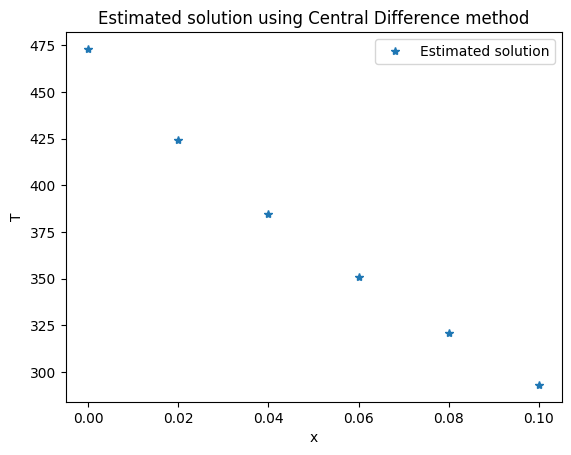

The estimated temperature at the nodes are: ['473.00', '424.46', '384.64', '350.91', '321.02', '293.00'] [K]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the parameters
dx = 0.02
Ts = 293
alpha = 166

# precompute elements of the matrix A and vector b
matrix_element = -(2 + dx**2 * alpha)
b_element = -(dx**2) * alpha * Ts

# grid creation
x = np.arange(0, 0.1 + dx, dx)
T = np.zeros(x.shape)

# boundary conditions
T[0] = 473
T[-1] = 293

# build the matrix A
A = np.zeros((len(x) - 2, len(x) - 2))
np.fill_diagonal(A, matrix_element) # fill the main diagonal
A[np.arange(3), np.arange(1, 4)] = 1  # fill the upper diagonal
A[np.arange(1, 4), np.arange(3)] = 1  # fill the lower diagonal

# build the vector b
b = np.array([b_element - T[0], b_element, b_element, b_element - T[-1]])

# solve the system of equations
T[1:-1] = np.linalg.solve(A, b)

# plot the solution
plt.plot(x, T, "*", label="Estimated solution")
plt.xlabel("x")
plt.ylabel("T")
plt.title("Estimated solution using Central Difference method")
plt.legend()
plt.show()

print(
    f"The estimated temperature at the nodes are: {[f'{temp:.2f}' for temp in T]} [K]"
)


### Summary of Finite Difference methods

Instead of using central differences, we can also use other numerical approximations for the derivatives.
Below, you find an overview of common approximations for first and second derivatives.


#### First order derivative


$$
\text{Backward Difference: } f'= \frac{f(x_i)-f(x_{i-1})}{\Delta x} + \mathcal{O}(\Delta x)
$$

$$
\text{Forward Difference: } f'= \frac{f(x_{i+1})-f(x_i)}{\Delta x}+ \mathcal{O}(\Delta x)
$$

$$
\text{Central Difference: } f'= \frac{f(x_{i+1})-f(x_{i-1})}{2\Delta x}+ \mathcal{O}(\Delta x)^2
$$

#### Second order derivative

$$
\text{Backward Difference: }f''(x_i)=\frac{f(x_i)-2f(x_{i-1})+ f(x_{i-2})}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

$$
\text{Forward Difference: }f''(x_i)=\frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

$$
\text{Central Difference: } f''= \frac{f(x_{i-1})-2f(x_i)+f(x_{i+1})}{\Delta x^2}+ \mathcal{O}(\Delta x)^2.
$$


### Exercise

:::{card}

You can practice solving boundary value problems with finite differences with the following second-order ODE:

$$
f''= x^2, \quad x \in(0,1)
$$

$$
f(0)=1, \quad f(1)=1
$$

Divide the domain [0,1] into 5 equal intervals and apply the central finite difference method to approximate $f''$ at each grid node.


```{admonition} Solution
:class: tip, dropdown

Discretize differential equation:

$$
f''_i \approx \frac{1}{\Delta x^2}(f_{i-1}-2f_i+f_{1+1}) = {x_i}^2
$$

Define the grid:

$\Delta x = (1-0)/5 = 0.2$, hence $\frac{1}{\Delta x^2} = \frac{1}{0.2^2}= 25$

$$
x_0 = 0, x_1 = 0.2, x_2= 0.4, x_3= 0.6, x_4= 0.8, x_5= 1
$$

Define BC:

$$
f_0 = 1, \quad f_5= 1
$$

Set up a system of equations for internal nodes $i= 1,...,4$ :

$$
25(f_0-2f_1+f_2)= 0.2^2
$$
$$
25(f_1-2f_2+f_3)= 0.4^2
$$
$$
25(f_2-2f_3+f_4)= 0.6^2
$$
$$
25(f_3-2f_4+f_5)= 0.8^2
$$

Plugging in the boundary conditions $f_0=1$ and $f_5=1$ and moving the knowns to the right-hand side:

$$
25(-2f_1+f_2)= 0.2^2 - 25
$$
$$
25(f_1-2f_2+f_3)= 0.4^2
$$
$$
25(f_2-2f_3+f_4)= 0.6^2
$$
$$
25(f_3-2f_4)= 0.8^2 - 25
$$

We can bring this to a system of linear equations of the form:

$$
\frac{1}{\Delta x^2}A\mathbf{f}=\mathbf{y}
$$

$$
25\begin{bmatrix}
-2 & 1 & 0 & 0 \\
1 & -2  & 1 & 0 \\
0 & 1 & -2  & 1 \\
0 & 0 & 1 & -2 
\end{bmatrix} \begin{bmatrix}
f_1 \\
f_2 \\
f_3 \\
f_4
\end{bmatrix}
=
\begin{bmatrix}
0.2^2 - 25\\
0.4^2 \\
0.6^2\\
0.8^2 - 25
\end{bmatrix}
$$

```

:::

% START-CREDIT
% source: numerical_modelling
```{attributiongrey} Attribution
:class: attribution
This chapter is written by Jaime Arriaga Garcia, Anna Störiko, Justin Pittman and Robert Lanzafame. {ref}`Find out more here <numerical_modelling_credit>`.
```
% END-CREDIT